In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [8]:
'''
Recognize whether a column is numerical or categorical.
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

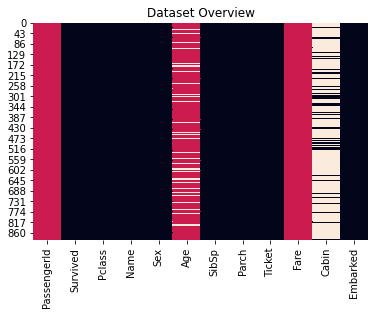

 Categerocial   Numeric   NaN 


In [9]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.groupby(['Survived','Pclass']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
0        1                80    80   80   64     80     80      80    80   
         2                97    97   97   90     97     97      97    97   
         3               372   372  372  270    372    372     372   372   
1        1               136   136  136  122    136    136     136   136   
         2                87    87   87   83     87     87      87    87   
         3               119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Survived Pclass                   
0        1          59        80  
         2           3        97  
         3           6       372  
1        1         117       134  
         2          13        87  
         3           6       119

In [27]:
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [36]:
df.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [35]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
A20            1
C85            1
B69            1
B94            1
E12            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
## Create new column
df["Cabin_section"] = df["Cabin"].apply(lambda x: str(x)[0])
## Plot contingency table
pd.crosstab(index=df["Cabin_section"], 
             columns=df["Pclass"], values=df["Survived"], aggfunc="sum")

Pclass,1,2,3
Cabin_section,,,
A,7.0,NaN,NaN
B,35.0,NaN,NaN
C,35.0,NaN,NaN
D,22.0,3.0,NaN
E,18.0,3.0,3.0
F,NaN,7.0,1.0
G,NaN,NaN,2.0
T,0.0,NaN,NaN
n,19.0,74.0,113.0


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_section
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [50]:
pd.pivot_table(df, index='Cabin_section', columns=['Pclass', 'Survived'], aggfunc='count')

Age                                Cabin                  ...  \
Pclass            1           2            3           1          2       ...   
Survived          0     1     0     1      0     1     0     1    0    1  ...   
Cabin_section                                                             ...   
A               5.0   7.0   NaN   NaN    NaN   NaN   8.0   7.0  NaN  NaN  ...   
B              11.0  34.0   NaN   NaN    NaN   NaN  12.0  35.0  NaN  NaN  ...   
C              21.0  30.0   NaN   NaN    NaN   NaN  24.0  35.0  NaN  NaN  ...   
D               7.0  20.0   1.0   3.0    NaN   NaN   7.0  22.0  1.0  3.0  ...   
E               7.0  17.0   1.0   2.0    NaN   3.0   7.0  18.0  1.0  3.0  ...   
F               NaN   NaN   1.0   7.0    3.0   0.0   NaN   NaN  1.0  7.0  ...   
G               NaN   NaN   NaN   NaN    2.0   2.0   NaN   NaN  NaN  NaN  ...   
T               1.0   NaN   NaN   NaN    NaN   NaN   1.0   NaN  NaN  NaN  ...   
n              12.0  14.0  87.0  71.0  265.0  80.0   0.0   0.0  0.0  0.0  ...   

              SibSp                     Ticket                                  
Pclass            2            3             1           2            3         
Survived          0     1      0      1      0     1     0     1      0      1  
Cabin_section                                                                   
A               NaN   NaN    NaN    NaN    8.0   7.0   NaN   NaN    NaN    NaN  
B               NaN   NaN    NaN    NaN   12.0  35.0   NaN   NaN    NaN    NaN  
C               NaN   NaN    NaN    NaN   24.0  35.0   NaN   NaN    NaN    NaN  
D               1.0   3.0    NaN    NaN    7.0  22.0   1.0   3.0    NaN    NaN  
E               1.0   3.0    NaN    3.0    7.0  18.0   1.0   3.0    NaN    3.0  
F               1.0   7.0    4.0    1.0    NaN   NaN   1.0   7.0    4.0    1.0  
G               NaN   NaN    2.0    2.0    NaN   NaN   NaN   NaN    2.0    2.0  
T               NaN   NaN    NaN    NaN    1.0   NaN   NaN   NaN    NaN    NaN  
n              94.0  74.0  366.0  113.0   21.0  19.0  94.0  74.0  366.0  113.0  

[9 rows x 60 columns]

**Real machine learning now**

In [154]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
df_train_s = df_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [149]:
df_test = pd.read_csv('test.csv')
df_test.head()

# df_test_s = df_test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# df_test_s["Age"] = df_test_s["Age"].fillna(df_test_s["Age"].mean())
# dummy = pd.get_dummies(df_test_s["Sex"], 
#                        prefix="Sex",drop_first=True)
# df_test_s= pd.concat([df_test_s, dummy], axis=1)
# print( df_test_s.filter(like="Sex", axis=1).head() )
# ## drop the original categorical column
# df_test_s = df_test_s.drop("Sex", axis=1)

# # Replace Embarked
# dummy2 = pd.get_dummies(df_test["Pclass"],prefix = 'Pclass',drop_first=True)
# df_test_s= pd.concat([df_test_s, dummy2], axis=1)
# print( df_test_s.filter(like="Pclass", axis=1).head() )
# ## drop the original categorical column
# df_test_s = df_test_s.drop("Pclass", axis=1)

# ## Replace Embarked
# dummy3 = pd.get_dummies(df_test_s["Embarked"], 
#                        prefix="Embarked",drop_first=True)
# df_test_s= pd.concat([df_test_s, dummy3], axis=1)
# print( df_test_s.filter(like="Embarked", axis=1).head() )
# ## drop the original categorical column
# df_test_s = df_test_s.drop("Embarked", axis=1)


# df_test_s.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
#We need to fill in missing ages with average age
df_train_s["Age"] = df_train_s["Age"].fillna(df_train_s["Age"].mean())

In [157]:
## Replace Sex with female and male to 0 1
dummy = pd.get_dummies(df_train_s["Sex"], 
                       prefix="Sex",drop_first=True)
df_train_s= pd.concat([df_train_s, dummy], axis=1)
print( df_train_s.filter(like="Sex", axis=1).head() )
## drop the original categorical column
df_train_s = df_train_s.drop("Sex", axis=1)

      Sex  Sex_male
0    male         1
1  female         0
2  female         0
3  female         0
4    male         1


In [158]:
# Replace Embarked
dummy2 = pd.get_dummies(df_train_s["Pclass"],prefix = 'Pclass',drop_first=True)
df_train_s= pd.concat([df_train_s, dummy2], axis=1)
print( df_train_s.filter(like="Pclass", axis=1).head() )
## drop the original categorical column
df_train_s = df_train_s.drop("Pclass", axis=1)

## Replace Embarked
dummy3 = pd.get_dummies(df_train["Embarked"], 
                       prefix="Embarked",drop_first=True)
df_train_s= pd.concat([df_train_s, dummy3], axis=1)
print( df_train.filter(like="Embarked", axis=1).head() )
## drop the original categorical column
df_train_s = df_train_s.drop("Embarked", axis=1)


df_train_s.head()

   Pclass  Pclass_2  Pclass_3
0       3         0         1
1       1         0         0
2       3         0         1
3       1         0         0
4       3         0         1
  Embarked
0        S
1        C
2        S
3        S
4        S


,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [163]:
df_train, df_val = model_selection.train_test_split(df_train_s, 
                      test_size=0.3)

## print info
print("X_train shape:", df_train.drop("Survived",axis=1).shape, "| X_test shape:", df_val.drop("Survived",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Survived"]),2), "| y_test mean:", round(np.mean(df_val["Survived"]),2))
print(df_train.shape[1], "features:", df_train.drop("Survived",axis=1).columns.to_list())

X_train shape: (623, 9) | X_test shape: (268, 9)
y_train mean: 0.39 | y_test mean: 0.36
10 features: ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S']


In [164]:
#I guess it's also a good idea to scale the features
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df_train.drop("Survived", axis=1))

df_scaled= pd.DataFrame(X, columns=df_train.drop("Survived", axis=1).columns, index=df_train.index)
df_scaled["Survived"] = df_train_s["Survived"]
df_scaled.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
297,0.022386,0.125,0.4,0.295806,0.0,0.0,0.0,0.0,1.0,0
824,0.022386,0.500,0.2,0.077465,1.0,0.0,1.0,0.0,1.0,0
294,0.334089,0.000,0.0,0.015412,1.0,0.0,1.0,0.0,1.0,0
66,0.404931,0.000,0.0,0.020495,0.0,1.0,0.0,0.0,1.0,1
414,0.617455,0.000,0.0,0.015469,1.0,0.0,1.0,0.0,1.0,1


Text(0.5, 1.0, 'pearson correlation')

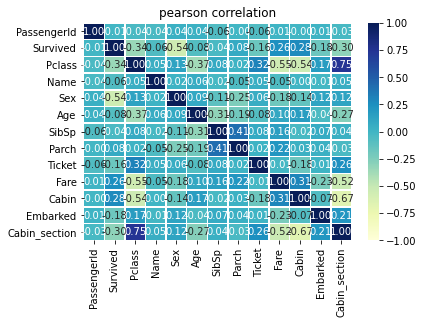

In [133]:
#Computing correlatin matrix of the variables we kept to see what we want to include
#first add cabin section
df_train["Cabin_section"] = df_train["Cabin"].apply(lambda x: str(x)[0])

corr_matrix = df_train.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
            
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [136]:
X = df_train.drop("Survived", axis=1).values
y = df_train['Survived'].values
feature_names = df_scaled.drop("Survived", axis=1).columns

#Anova selection of vars
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=6).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]
anova_selected_features

Index(['Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_S'], dtype='object')

In [138]:
## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=6).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
lasso_selected_features

Index(['Age', 'SibSp', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_S'], dtype='object')

<AxesSubplot:xlabel='selection', ylabel='features'>

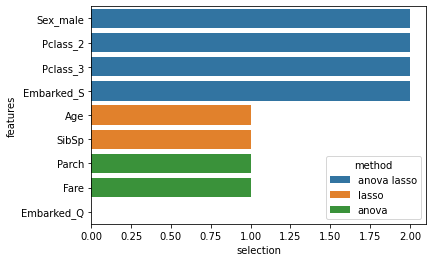

In [139]:
## Plot
df_features = pd.DataFrame({"features":feature_names})
df_features["anova"] = df_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
df_features["num1"] = df_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
df_features["lasso"] = df_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
df_features["num2"] = df_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
df_features["method"] = df_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
df_features["selection"] = df_features["num1"] + df_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=df_features.sort_values("selection", ascending=False), dodge=False)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


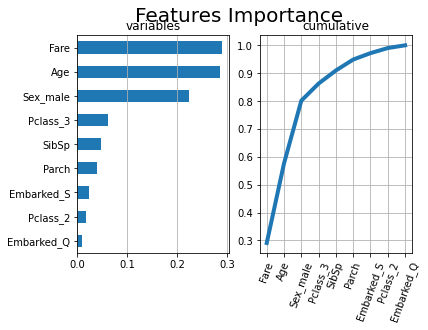

In [145]:
X = df_scaled.drop("Survived", axis=1).values
y = df_scaled["Survived"].values
feature_names = df_scaled.drop("Survived", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
df_importances['cumsum'] =  df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), 
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [168]:
X_names = ["Age", "Fare", "Sex_male", "SibSp", "Pclass_3", "Parch",
           "Embarked_S", "Pclass_2"]

X_train = df_train[X_names].values
y_train = df_train["Survived"].values
X_test = df_val[X_names].values
y_test = df_val["Survived"].values


array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0])

**Here are the actual machine learning algorithms**

In [171]:
#This is using a gradient boosting classifier
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=50, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.9, 'n_estimators': 1500, 'min_samples_split': 60, 'min_samples_leaf': 7, 'max_features': 5, 'max_depth': 7, 'learning_rate': 0.005}
Best Model mean accuracy: 0.8475354838709677
